In [52]:
from skimage.metrics import structural_similarity #helps to fin structural similarity
import imutils       #grabbing contours of the image
import cv2           #computer vision
from PIL import Image  #downloading and visulaizing image
import requests      #fetch data from urls

In [53]:
!mkdir pan_card_tampering  #making directory
!mkdir pan_card_tampering/image #making a folder inside the directory

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


In [54]:
original_image = Image.open(requests.get('https://images.moneycontrol.com/static-mcnews/2018/06/A_sample_of_Permanent_Account_Number_PAN_Card_1280x720.jpg',stream = True).raw)
tampered_image = Image.open(requests.get('https://5.imimg.com/data5/XC/LH/BB/ANDROID-13177721/product-jpeg-500x500.jpg',stream = True).raw)

In [55]:
print('original image format: ',original_image.format)
print('tampered image fromat ', tampered_image.format)

print('original image size: ', original_image.size)
print('tamered image size:', tampered_image.size)

original image format:  JPEG
tampered image fromat  JPEG
original image size:  (1280, 720)
tamered image size: (500, 312)


In [56]:
original = original_image.resize((250,160)) #resizing the original image 
print(original.size) #printing the size of original image
original.save('pan_card_tampering/image/original.jpg') #saving the image

tampered = tampered_image.resize((250,160)) #resizing the tampered image
print(tampered.size) #printing the size of tampered
tampered.save('pan_card_tampering/image/tampered.jpg') #save the tampered image

(250, 160)
(250, 160)


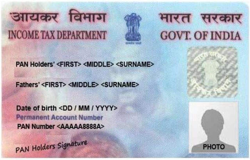

In [57]:
original

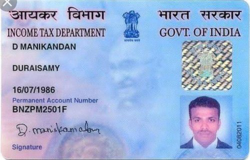

In [58]:
tampered

In [59]:
#saving the images respectively
original = cv2.imread('pan_card_tampering/image/original.jpg') 
tampered = cv2.imread('pan_card_tampering/image/tampered.jpg')

In [60]:
original_gray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY) #coverting original RGB to GRAY
tampered_gray = cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY) #coverting tampered RGB to GRAY

In [61]:
#to find structural similarity
(score,diff) = structural_similarity( original_gray , tampered_gray , full = True) 
diff = (diff*255).astype("uint8") #to normalize
print ('SSIM: {}'.format(score)) #to find structural similarity index ehich signifies who accurate the image meets with the tampered image

SSIM: 0.2965186415366247


In [62]:
thresh = cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] #threshold of image
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #to find the contours of the image
cnts = imutils.grab_contours(cnts)

In [63]:
# we make a bounding rectangle around the contours
for c in cnts :
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered, (x,y),(x+w,y+h),(0,0,255),2)

Original Format Image


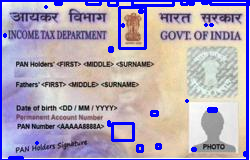

In [64]:
print('Original Format Image')
Image.fromarray(original)

tampered image


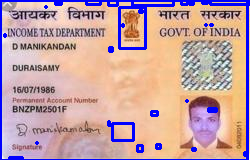

In [65]:
print('tampered image')
Image.fromarray(tampered)

different image


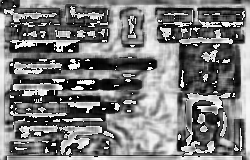

In [66]:
print('different image')
Image.fromarray(diff) #THIS GIVES THE DIFFERENCE IN PAN CARD IMAGE FROM ORIGINAL 